In [ ]:
# Project: Predict BAC Stock Price Using Machine Learning and Macroeconomics indicators

# 1) Build ML models to predict BAC's next day price using historical stock data, peer financial stocks (JPM, MS, C, WFC), 
# and key macroeconomic var (VIX, 10Y Treasury Yield, Dollar Index Oil Prices, and Gold Price)

# 2) Perform feature engineering

# 3) Apply different ML algorithms such as Decision Tree, Random Forest, Support Vector Machine, and K-nearest
# Neighbors (KNN) models

# 4) Evaluate the model based on R square, rmse, mse, mae and other metrics

In [1]:
# Import neccessary data science packages
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
# 'BAC' => Bank of America Corp (peer finance stock)
# 'JPM' => JP Morgan Chase & Co. (peer finance stock)
# 'MS' => Morgan Stanley (peer finance stock)
# 'C' => Citi Group (peer finance stock)
# 'WFC' => Wells Fargo & Co (peer finance stock)
# 'SPY' => S&P500 ETF (Market Index)
# '^VIX' => CBOE Volatility Index (market fear indicator)
# '^TNX' => 10Y US Treasury Yield (Interest Rate Indicator)
# 'DX-Y.NYB' => US Dollar Index (Strength of US Dollar)
# 'CL=F' => # Crude Oil Future (Inflation/energy proxy)
# 'GC=F' => Gold Futures (safe asset)

In [3]:
# Download the data from yahoo finance
tickers = ['BAC','JPM', 'MS', 'C', 'WFC', 'SPY', '^VIX', '^TNX', 'DX-Y.NYB', 'CL=F', 'GC=F']
data = yf.download(tickers, start = '2002-01-01', end = '2025-01-01')['Close']
data 

C:\Users\Naitik Patel\AppData\Local\Temp\ipykernel_21172\1903781880.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start = '2002-01-01', end = '2025-01-01')['Close']
[*********************100%***********************]  11 of 11 completed


Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
Date,,,,,,,,,,,
2002-01-02,17.641190,272.726349,21.010000,115.790001,278.899994,18.408506,27.593233,74.703072,11.182110,5.157,22.709999
2002-01-03,17.621582,272.940216,20.370001,116.110001,278.200012,18.899742,28.392748,75.550133,11.223305,5.120,21.340000
2002-01-04,17.896173,278.019501,21.620001,116.330002,278.899994,19.750534,29.801891,76.054512,11.251612,5.141,20.450001
2002-01-07,17.683216,274.758026,21.480000,116.330002,278.600006,19.699900,29.577019,75.517815,11.269630,5.057,21.940001
2002-01-08,17.400227,264.652893,21.250000,116.830002,278.899994,19.547968,28.957401,75.343216,11.225875,5.057,21.830000
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,43.600803,69.083389,70.099998,108.260002,2620.000000,237.286880,123.599083,596.076904,70.067413,4.591,14.270000
2024-12-26,43.767818,69.423943,69.620003,108.129997,2638.800049,238.099670,124.542656,596.116638,70.233810,4.579,14.730000
2024-12-27,43.561504,69.083389,70.599998,108.000000,2617.199951,236.170517,123.307259,589.841553,69.597633,4.619,15.950000


In [4]:
# Information about your data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5810 entries, 2002-01-02 to 2024-12-31
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BAC       5789 non-null   float64
 1   C         5789 non-null   float64
 2   CL=F      5779 non-null   float64
 3   DX-Y.NYB  5807 non-null   float64
 4   GC=F      5775 non-null   float64
 5   JPM       5789 non-null   float64
 6   MS        5789 non-null   float64
 7   SPY       5789 non-null   float64
 8   WFC       5789 non-null   float64
 9   ^TNX      5783 non-null   float64
 10  ^VIX      5789 non-null   float64
dtypes: float64(11)
memory usage: 544.7 KB


In [5]:
# Statistical Summary of Data
data.describe()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
count,5789.000000,5789.000000,5779.000000,5807.000000,5775.000000,5789.000000,5789.000000,5789.000000,5789.000000,5783.000000,5789.000000
mean,21.845039,108.706594,66.811741,90.834782,1212.050857,60.128536,37.036111,188.713280,29.228941,3.079020,19.471192
std,9.928677,109.153036,24.071656,10.092435,555.276716,48.947084,23.527699,132.976984,12.865738,1.158701,8.613284
min,2.442876,7.568430,-37.630001,71.330002,278.100006,8.126897,6.377221,50.092167,5.326458,0.499000,9.140000
25%,12.591781,36.205486,48.520000,81.879997,732.649994,24.776020,21.307301,86.553772,18.006205,2.130000,13.610000
50%,22.604198,50.127060,66.230003,90.779999,1253.000000,37.517159,28.930735,133.053680,24.123178,2.979000,17.100000
75%,29.215792,194.672913,84.514999,97.825001,1648.750000,89.117088,41.938263,256.664093,40.542667,4.099500,22.530001
max,46.671661,378.467773,145.289993,120.239998,2788.500000,245.101456,131.313080,600.509277,75.704918,5.428000,82.690002


In [6]:
# How many missing values are present in my dataset
data.isnull().sum()

Ticker
BAC         21
C           21
CL=F        31
DX-Y.NYB     3
GC=F        35
JPM         21
MS          21
SPY         21
WFC         21
^TNX        27
^VIX        21
dtype: int64

In [7]:
# What can we do with missing data?
# 1) Drop the values
# 2) Forward Fill => Carries forward the last known value
# 3) Backward Fill => Filling the value backward
# 4) Average of the particular stock
# 5) Interpolation => Linear Interpolation or Cubic Spline Interpolation or Monotone Convex Interpolation

In [8]:
# Eg: Forward Fill
#df = [100, np.nan, np.nan, 200]
# df = df.fillna(method = 'ffill') or df = df.ffill()
# df = [100,100,100,200]

In [9]:
# Eg: Backward Fill
#df = [100, np.nan, np.nan, 200]
# df = [100,200,200,200]

In [10]:
# Average
#df = [100, np.nan, np.nan, 200]
#df = [100, 150, 150, 200]
#(200+100)/2 = 150

In [11]:
# Appplying forward fill on my dataset
data = data.ffill()
data.head()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
Date,,,,,,,,,,,
2002-01-02,17.641190,272.726349,21.010000,115.790001,278.899994,18.408506,27.593233,74.703072,11.182110,5.157,22.709999
2002-01-03,17.621582,272.940216,20.370001,116.110001,278.200012,18.899742,28.392748,75.550133,11.223305,5.120,21.340000
2002-01-04,17.896173,278.019501,21.620001,116.330002,278.899994,19.750534,29.801891,76.054512,11.251612,5.141,20.450001
2002-01-07,17.683216,274.758026,21.480000,116.330002,278.600006,19.699900,29.577019,75.517815,11.269630,5.057,21.940001
2002-01-08,17.400227,264.652893,21.250000,116.830002,278.899994,19.547968,28.957401,75.343216,11.225875,5.057,21.830000


In [12]:
# How many missing values are present in my dataset
data.isnull().sum()

Ticker
BAC         0
C           0
CL=F        0
DX-Y.NYB    0
GC=F        0
JPM         0
MS          0
SPY         0
WFC         0
^TNX        0
^VIX        0
dtype: int64

In [13]:
# Correlation in our data
data.corr()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
Ticker,,,,,,,,,,,
BAC,1.000000,0.461779,-0.070637,0.360871,0.071502,0.569557,0.786216,0.544844,0.342323,0.381009,-0.214983
C,0.461779,1.000000,-0.328865,-0.056293,-0.753355,-0.404546,-0.078854,-0.429433,-0.509659,0.716295,-0.165584
CL=F,-0.070637,-0.328865,1.000000,-0.513374,0.436498,0.117551,0.110137,0.140270,0.149889,-0.045080,-0.111997
DX-Y.NYB,0.360871,-0.056293,-0.513374,1.000000,0.165210,0.527508,0.509171,0.542913,0.449883,0.055238,0.003703
GC=F,0.071502,-0.753355,0.436498,0.165210,1.000000,0.787185,0.581200,0.810607,0.694652,-0.526051,-0.022830
JPM,0.569557,-0.404546,0.117551,0.527508,0.787185,1.000000,0.902370,0.987253,0.834764,-0.196493,-0.136455
MS,0.786216,-0.078854,0.110137,0.509171,0.581200,0.902370,1.000000,0.901737,0.660625,0.098139,-0.153446
SPY,0.544844,-0.429433,0.140270,0.542913,0.810607,0.987253,0.901737,1.000000,0.824806,-0.243903,-0.126401
WFC,0.342323,-0.509659,0.149889,0.449883,0.694652,0.834764,0.660625,0.824806,1.000000,-0.322967,-0.333026


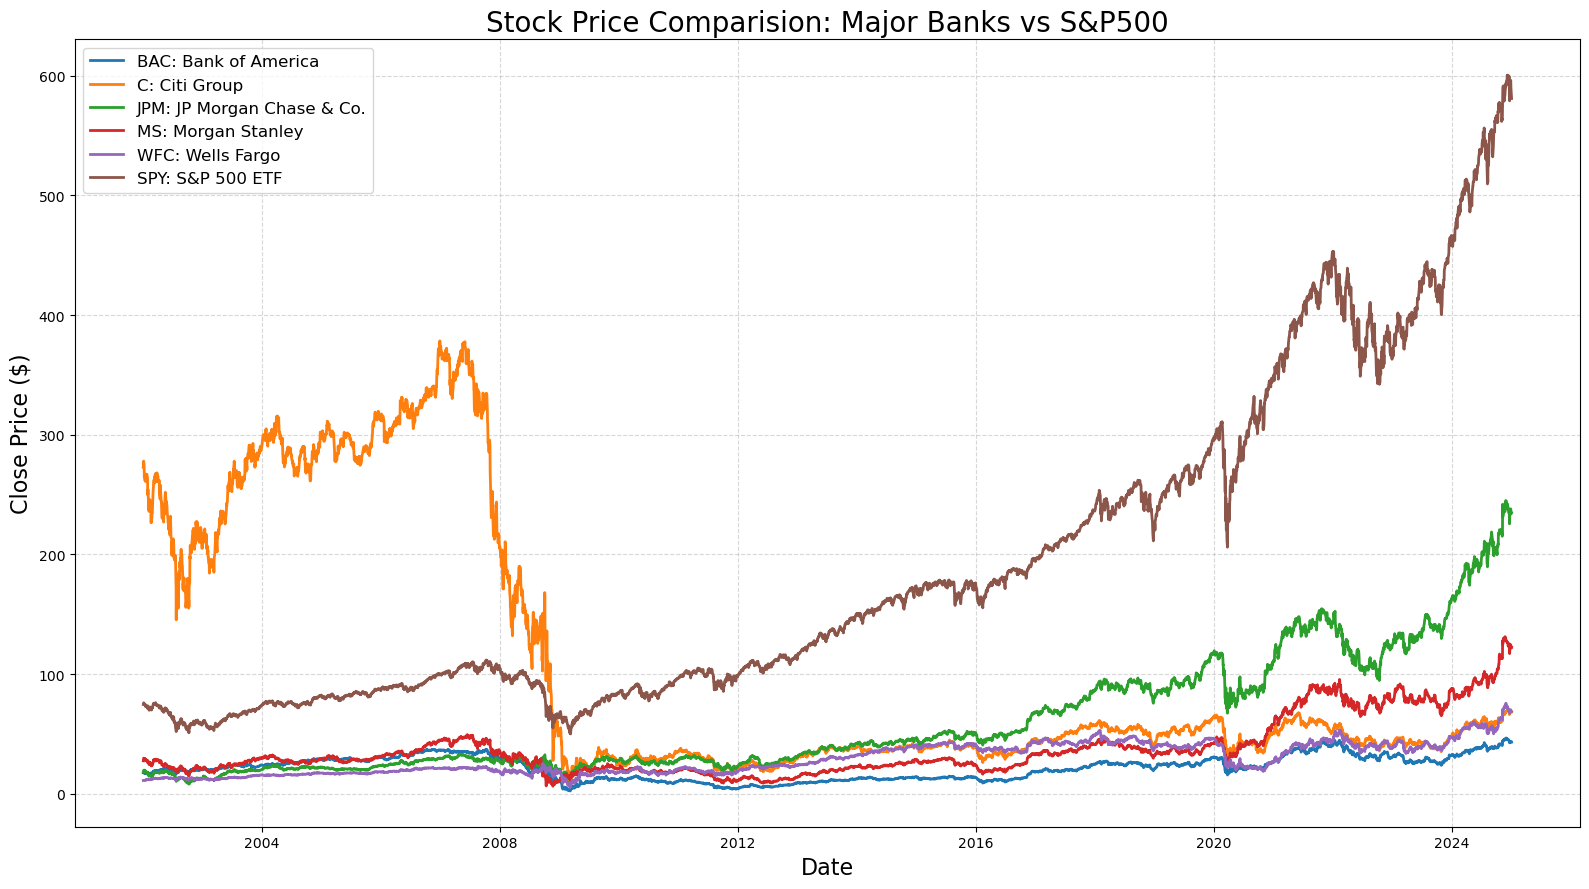

In [17]:
import matplotlib.pyplot as plt
# Create a larger picture
plt.figure(figsize = (16,9))
# Plot each stock
plt.plot(data.index, data['BAC'], label = 'BAC: Bank of America', linewidth = 2)
plt.plot(data.index, data['C'], label = 'C: Citi Group', linewidth = 2)
plt.plot(data.index, data['JPM'], label = 'JPM: JP Morgan Chase & Co.', linewidth = 2)
plt.plot(data.index, data['MS'], label = 'MS: Morgan Stanley', linewidth = 2)
plt.plot(data.index, data['WFC'], label = 'WFC: Wells Fargo', linewidth = 2)
plt.plot(data.index, data['SPY'], label = 'SPY: S&P 500 ETF', linewidth = 2)
# Title, label for X & Y Axis
plt.title('Stock Price Comparision: Major Banks vs S&P500', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Close Price ($)', fontsize = 16)
# Add grid lines for readability
plt.grid(True, linestyle = '--', alpha = 0.5)
# Customize legend
plt.legend(fontsize = 12, loc = 'upper left')
# Show the plot
plt.tight_layout()
plt.show()

In [18]:
data.head()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
Date,,,,,,,,,,,
2002-01-02,17.641190,272.726349,21.010000,115.790001,278.899994,18.408506,27.593233,74.703072,11.182110,5.157,22.709999
2002-01-03,17.621582,272.940216,20.370001,116.110001,278.200012,18.899742,28.392748,75.550133,11.223305,5.120,21.340000
2002-01-04,17.896173,278.019501,21.620001,116.330002,278.899994,19.750534,29.801891,76.054512,11.251612,5.141,20.450001
2002-01-07,17.683216,274.758026,21.480000,116.330002,278.600006,19.699900,29.577019,75.517815,11.269630,5.057,21.940001
2002-01-08,17.400227,264.652893,21.250000,116.830002,278.899994,19.547968,28.957401,75.343216,11.225875,5.057,21.830000


In [19]:
data.columns

Index(['BAC', 'C', 'CL=F', 'DX-Y.NYB', 'GC=F', 'JPM', 'MS', 'SPY', 'WFC',
       '^TNX', '^VIX'],
      dtype='object', name='Ticker')

In [20]:
# Feature Engineering
df = pd.DataFrame(index = data.index)
# Create lag features - Stock Data
df['JPM(t-1)'] = data['JPM'].shift(1)
df['BAC(t-1)'] = data['BAC'].shift(1)
df['MS(t-1)'] = data['MS'].shift(1)
df['C(t-1)'] = data['C'].shift(1)
df['WFC(t-1)'] = data['WFC'].shift(1)
df['SPY(t-1)'] = data['SPY'].shift(1)
# Create lag features - Macroeconmic Data
df['VIX(t-1)'] = data['^VIX'].shift(1)
df['10Y_Yield(t-1)'] = data['^TNX'].shift(1)
df['Gold_Futures(t-1)'] = data['GC=F'].shift(1)
df['US_Dollar_Index(t-1)'] = data['DX-Y.NYB'].shift(1)
df['Crude_Oil_Futures(t-1)'] = data['CL=F'].shift(1)
# Technical Indicators = Moving Average and Rolling Volatility
df['BAC_MA5'] = data['BAC'].rolling(window = 5).mean().shift(1)
df['BAC_MA10'] = data['BAC'].rolling(window = 10).mean().shift(1)
df['BAC_Volatility5'] = data['BAC'].pct_change(5).shift(1)
# Create Target Variable
df['Target'] = data['BAC']
# Drop nan values
df = df.dropna()
df

,JPM(t-1),BAC(t-1),MS(t-1),C(t-1),WFC(t-1),SPY(t-1),VIX(t-1),10Y_Yield(t-1),Gold_Futures(t-1),US_Dollar_Index(t-1),Crude_Oil_Futures(t-1),BAC_MA5,BAC_MA10,BAC_Volatility5,Target
Date,,,,,,,,,,,,,,,
2002-01-16,19.178282,17.218090,29.022614,265.829224,11.666053,74.457405,22.700001,4.831,284.399994,117.290001,18.900000,17.205205,17.426841,-0.010467,17.035969
2002-01-17,18.489536,17.035969,28.029284,261.231323,11.673768,72.950783,23.450001,4.839,287.299988,117.589996,18.860001,17.140760,17.366319,-0.018563,17.125629
2002-01-18,18.661726,17.125629,28.917269,266.791718,11.740699,73.500381,22.250000,4.933,284.399994,117.849998,18.040001,17.091446,17.316724,-0.014194,17.035969
2002-01-21,18.185696,17.035969,28.405535,267.112457,11.681494,73.164139,22.520000,4.888,283.100006,117.510002,18.000000,17.085842,17.230703,-0.001642,17.035969
2002-01-22,18.185696,17.035969,28.405535,267.112457,11.681494,73.164139,22.520000,4.888,283.100006,117.660004,18.000000,17.090325,17.165979,0.001318,17.559937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,233.448151,43.119408,121.060181,67.886589,69.039757,589.524414,16.780001,4.599,2612.300049,108.040001,69.239998,43.225510,44.115602,-0.034748,43.600803
2024-12-26,237.286880,43.600803,123.599083,69.083389,70.067413,596.076904,14.270000,4.591,2620.000000,108.260002,70.099998,43.093862,43.981008,-0.014872,43.767818
2024-12-27,238.099670,43.767818,124.542656,69.423943,70.233810,596.116638,14.730000,4.579,2638.800049,108.129997,69.620003,43.300175,43.830694,0.024138,43.561504


In [21]:
# Train our ML Algo
# a) Tell what is X variables and my Y Variable - Supervised ML Algo
# b) Split our data into training and testing (90:10)
# c) Apply ML Algo
# d) Do Prediction
# e) Evaluate the model based on R2, rmse and mse
# f) Visualtion => Actual vs Forecasted

In [22]:
# a) Tell what is X variables and my Y Variable
X = df.drop('Target', axis = 1)
Y = df['Target']

In [24]:
# b) Split our data into training and testing (90:10)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle = False, test_size = 0.10)

In [25]:
# c) Apply ML Algo: Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth = 4) # Calling the DT Model
dt_model.fit(X_train, Y_train) # Train my DT Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 100)
rf_model.fit(X_train, Y_train)
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors = 5)
knn_model.fit(X_train, Y_train)
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train, Y_train)

SVR()

In [28]:
# d) Do Prediction: X_test and Y_test are my actual values
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
svr_pred = svr_model.predict(X_test)

In [27]:
# Actual vs Predicted = Decision Tree
result = pd.DataFrame(Y_test.index)
result['Actual'] = Y_test.values
result['DT Prediction'] = dt_pred
result['RF Prediction'] = rf_pred
result['KNN Prediction'] = knn_pred
result['SVR Prediction'] = svr_pred
result

,Date,Actual,DT Prediction,RF Prediction,KNN Prediction,SVR Prediction
0,2022-09-12,32.580036,31.930039,31.984198,31.324107,32.889719
1,2022-09-13,31.406889,31.930039,32.293532,31.078346,33.196443
2,2022-09-14,31.286810,31.930039,31.543279,31.124231,31.859258
3,2022-09-15,31.877995,31.930039,31.491794,31.116793,31.983442
4,2022-09-16,31.517735,31.930039,31.825141,30.929984,31.933742
...,...,...,...,...,...,...
575,2024-12-24,43.600803,42.704296,42.824485,33.903912,34.697874
576,2024-12-26,43.767818,42.704296,42.892004,33.903912,34.810706
577,2024-12-27,43.561504,42.704296,43.652555,33.903912,34.427091
578,2024-12-30,43.139053,42.704296,42.842553,33.903912,34.686220


In [29]:
# e) Evaluate the model based on R2, rmse and mse
from sklearn.metrics import r2_score, mean_squared_error
def evaluate_model(y_true, y_pred, model_name):
 r2 = r2_score(y_true, y_pred)
 mse = mean_squared_error(y_true, y_pred) # mse: mean squared error
 rmse = np.sqrt(mse) # rmse: root means sqaured error
 print("Model Name:", model_name)
 print("R2 Value", r2)
 print("MSE", mse)
 print("RMSE", rmse)
 print("\n")

# Y_test = Actual Value
# dt_pred, rf_pred = Predicted Value
evaluate_model(Y_test, dt_pred, "Decision Tree")
evaluate_model(Y_test, rf_pred, "Random Forest")
evaluate_model(Y_test, knn_pred, "K Nearest Neighbor")
evaluate_model(Y_test, svr_pred, "Support Vector Regressor")

Model Name: Decision Tree
R2 Value 0.9582605541491536
MSE 1.3086201223114131
RMSE 1.1439493530359695


Model Name: Random Forest
R2 Value 0.9836508142828695
MSE 0.5125816353503269
RMSE 0.7159480674953504


Model Name: K Nearest Neighbor
R2 Value -0.6043991932720267
MSE 50.30131631451441
RMSE 7.092342089501494


Model Name: Support Vector Regressor
R2 Value 0.011413131861522485
MSE 30.99429429230424
RMSE 5.567251951573976




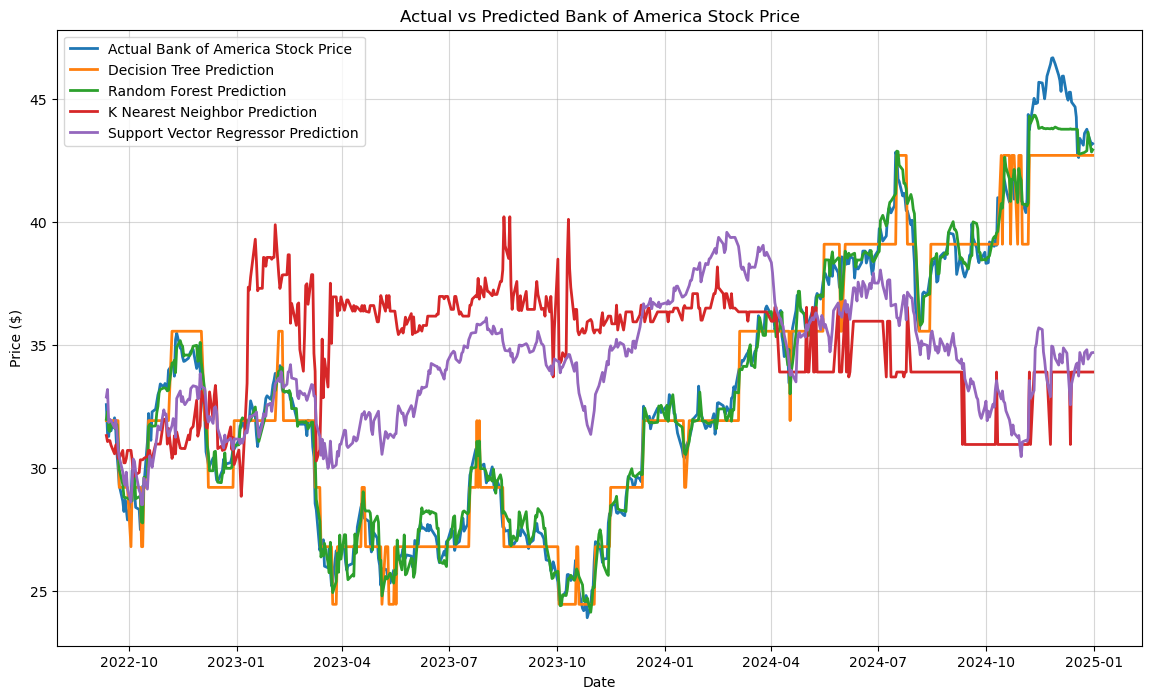

In [32]:
# f) Visualtion => Actual vs Forecasted
# Plot figure => tell figure size
plt.figure(figsize = (14,8))
#Plot Actual Value and Predicted Value (X = Date, Y = Stock Price)
plt.plot(Y_test.index, Y_test, label = 'Actual Bank of America Stock Price', linewidth = 2)
plt.plot(Y_test.index, dt_pred, label = 'Decision Tree Prediction', linewidth = 2)
plt.plot(Y_test.index, rf_pred, label = "Random Forest Prediction", linewidth = 2)
plt.plot(Y_test.index, knn_pred, label = "K Nearest Neighbor Prediction", linewidth = 2)
plt.plot(Y_test.index, svr_pred, label = "Support Vector Regressor Prediction", linewidth = 2)
# Highlight title, xlabel, and ylabel
plt.title("Actual vs Predicted Bank of America Stock Price")
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(alpha = 0.5)
plt.legend()
plt.show()

In [33]:
# What all features are important?
importance = dt_model.feature_importances_
features_name = X_train.columns
df_features = pd.DataFrame({'Feature':features_name, 'Importance': importance})
df_features = df_features.sort_values(by = 'Importance', ascending = False)
df_features

,Feature,Importance
1,BAC(t-1),1.0
0,JPM(t-1),0.0
2,MS(t-1),0.0
3,C(t-1),0.0
4,WFC(t-1),0.0
5,SPY(t-1),0.0
6,VIX(t-1),0.0
7,10Y_Yield(t-1),0.0
8,Gold_Futures(t-1),0.0
9,US_Dollar_Index(t-1),0.0


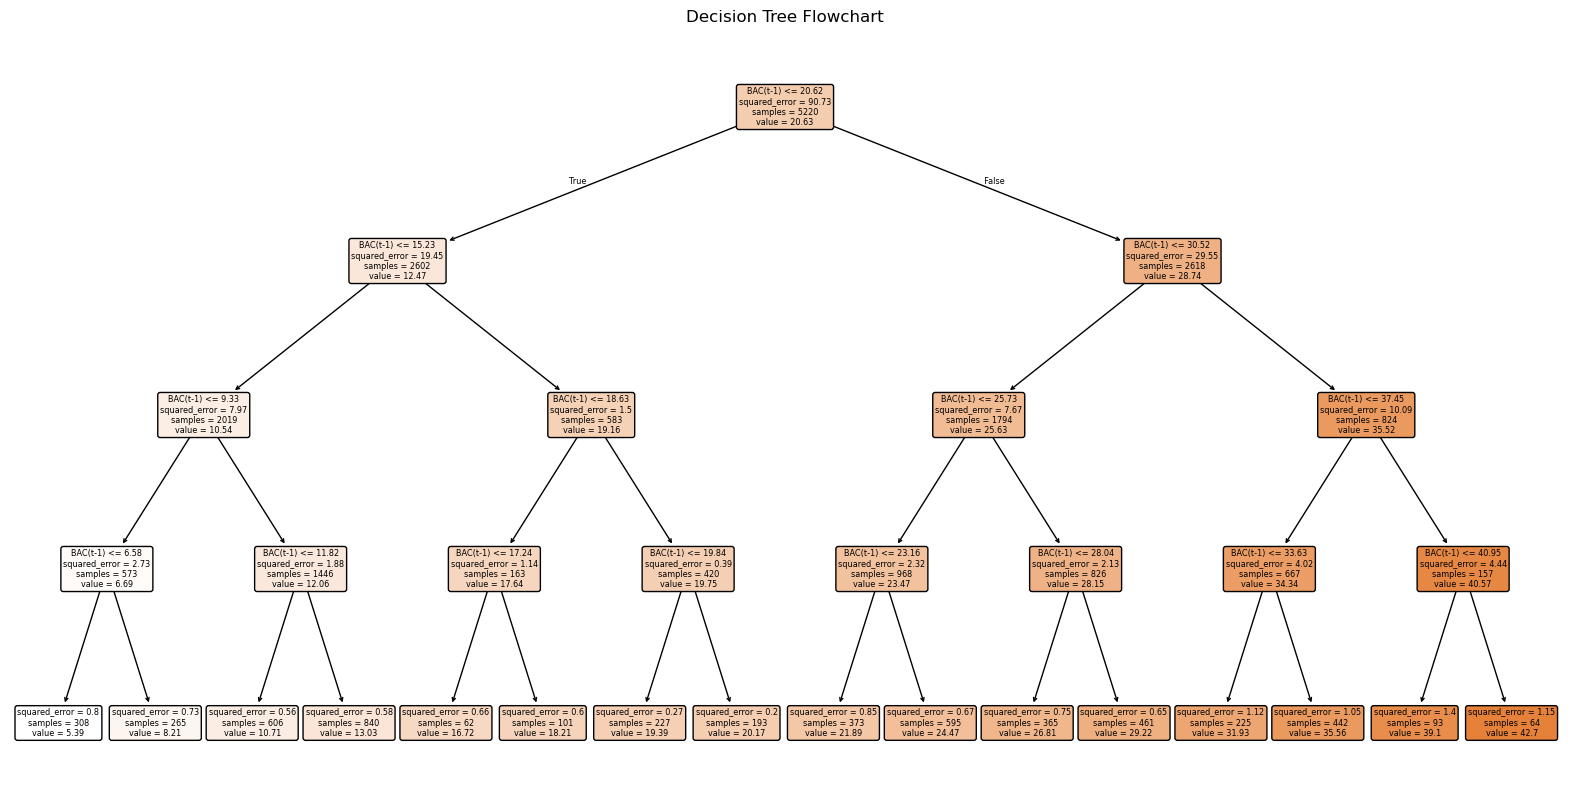

In [34]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,10))
plot_tree(dt_model, feature_names = X.columns, filled = True, rounded = True, precision = 2)
plt.title("Decision Tree Flowchart")
plt.show()